# Data Viz TP 4: Plotting with Seaborn

In [1]:
%matplotlib inline
# allows the output of Matplotlib plots to be displayed directly in the notebook interface,
# rather than in a separate window or as a pop-up.

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Bar Plots

<Axes: xlabel='tip_pct', ylabel='day'>

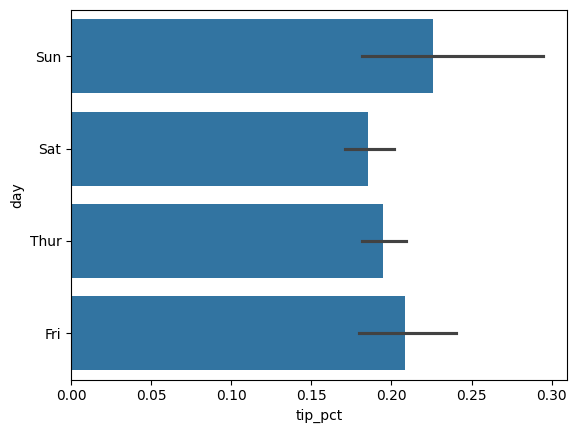

In [ ]:
# with data that requires aggregation or summarization before making a plot,
# using the seaborn package can make things much simpler

# load data
tips = pd.read_csv('tips.csv')

tips["tip_pct"] = tips["tip"]/(tips["total_bill"] - tips["tip"])

sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

In [ ]:
# plotting function in seaborn take a data argument, which can be a pandas DataFrame.
# the other arguments refer to column names
# because there are multiple observations for each value in the day, the bars are the average value of tip_pct
# the black lines drawn on the bars represent the 95% confidence interval

<Axes: xlabel='tip_pct', ylabel='day'>

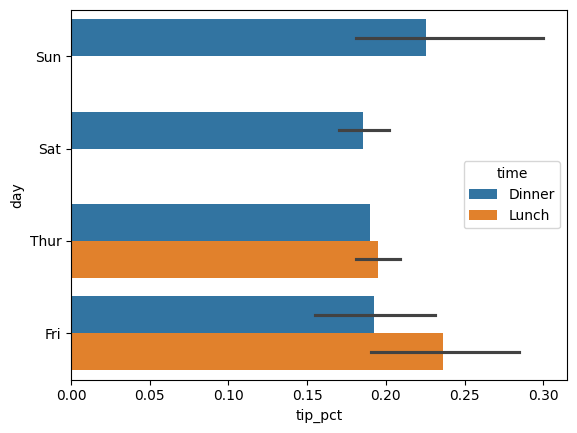

In [ ]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

## Histograms and Density Plots

<Axes: ylabel='Frequency'>

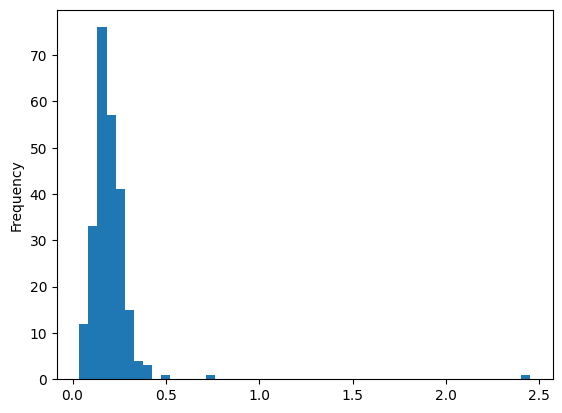

In [ ]:
# a histogram is a kind of bar plot that gives a discretized display of value frequency
tips["tip_pct"].plot.hist(bins=50)

<Axes: ylabel='Density'>

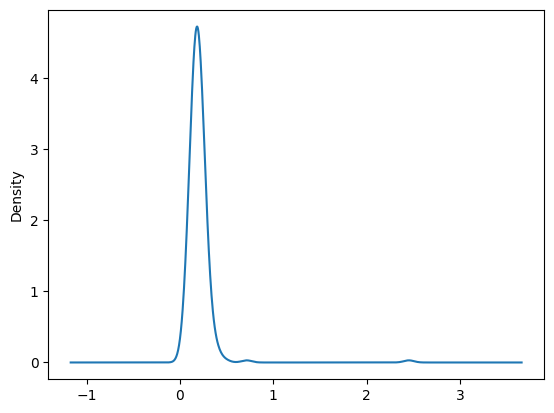

In [ ]:
# density plot is formed by computing an estimate of a continuous probability distribution
# that might have generated the observed data
# the usual procedure is to approximate this distribution as a mixture of "kernels"-that is
# simpler distributions like the normal distribution.
# thus density plots are also known as kernel density estimate (KDE) plots.
# using plot.density makes a density plot using the conventional mixtures-of-normals estimate.
tips["tip_pct"].plot.density()

<Axes: ylabel='Count'>

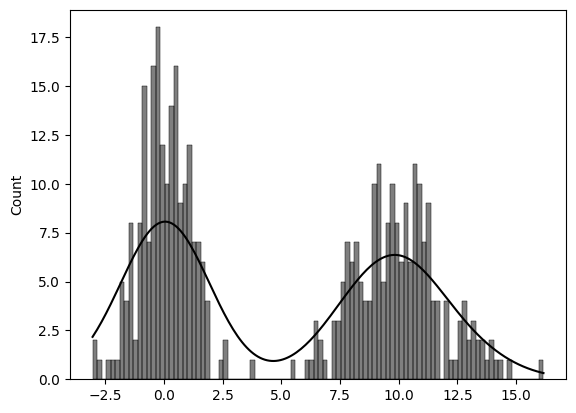

In [ ]:
# seaborn makes histograms and density plots even easier through its histplot method,
# which can plot both a histogram and a continuous density estimate simultaneously
# As an example, consider a bimodal distribution consisting of draws from two different
# standard normal distributions:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.histplot(values, bins=100, color='black', kde=True)

## Scatter or Point Plots

In [ ]:
# point plots or scatter plots can be a useful way of examining the relationship
# between two one-dimensional data series.
# for example, here we load the macrodata dataset from the statsmodels project,
# select a few variables, then compute log differences:
macro = pd.read_csv('macrodata.csv')
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

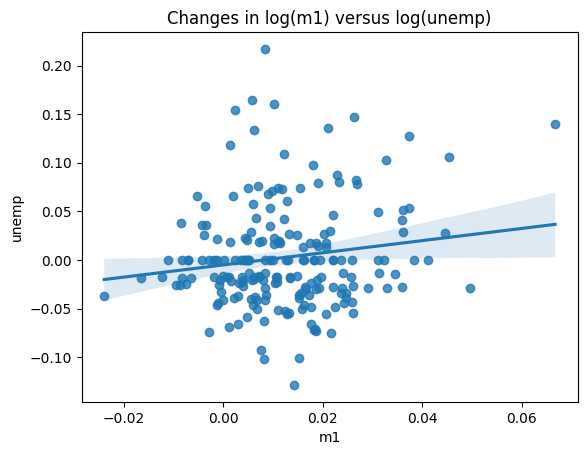

In [ ]:
# we can then use seaborn's regplot method, which make a scatter plot and
# fits a liear regression line.
import seaborn as sns
#ax = plt.subplots()
sns.regplot(x="m1", y="unemp", data=trans_data)
plt.title("Changes in log(m1) versus log(unemp)")

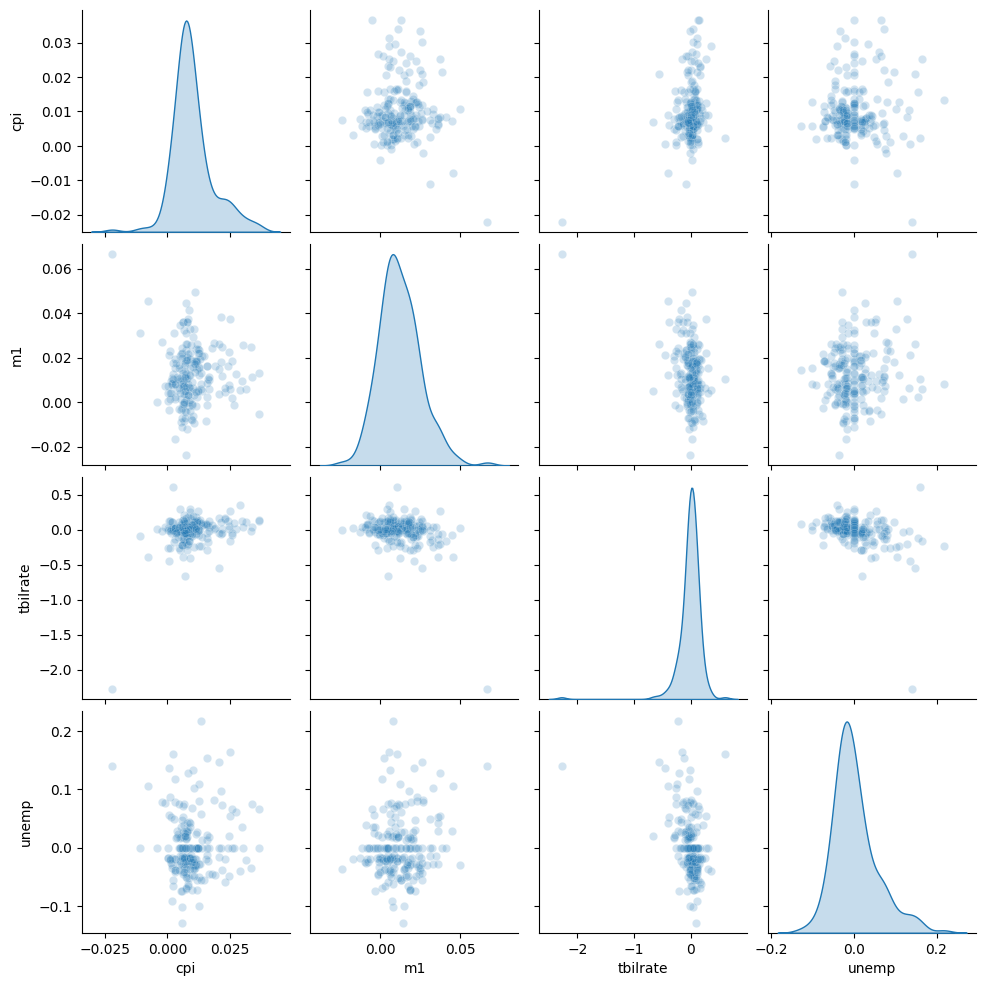

In [ ]:
# In exploratory data analysis, it's helpful to be able to look at all the scatter plots
# among a group of variables; this is known as pairs plot or scatter plot matrix.
# Making such a plot from scratch is a bit of work, so seaborn has a convenient pairplot
# functions that supports placing histograms or density estimates of each each variable a long
# the diagonal:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={"alpha": 0.2})

## Facet Grids and Categorical Data

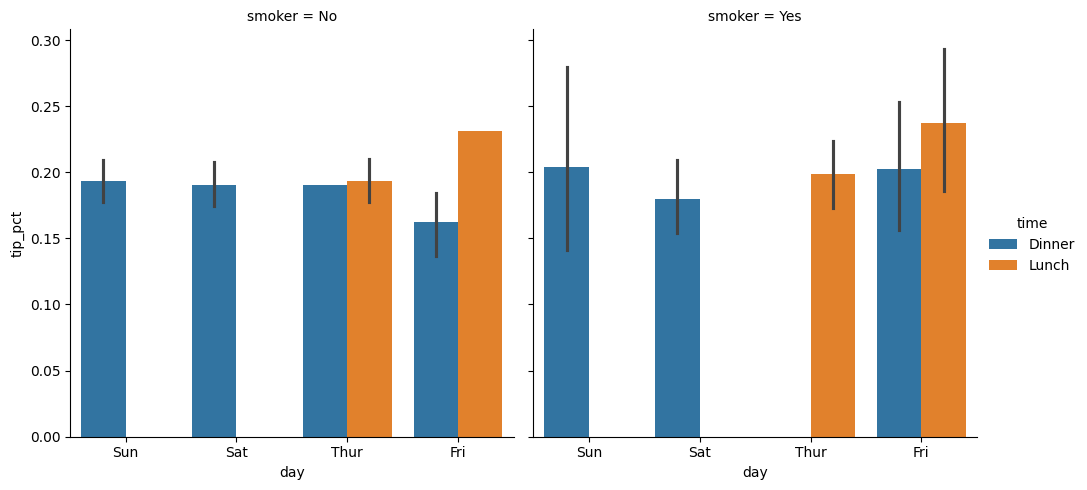

In [ ]:
# What about datasets where we have additional grouping dimensions?
# One way to visualize data with many categorical variables is to use a facet grid,
# which is a two-dimensional layout of plots where the data is split across the plot
# on each axis based on the distinct values of a certain variable.
# seaborn has a useful built-in function cat plot that simplifies making many kinds of
# faceted plots split by categorical variables:

sns.catplot(x="day", y="tip_pct", hue="time", col="smoker", kind="bar", data=tips[tips.tip_pct <1])

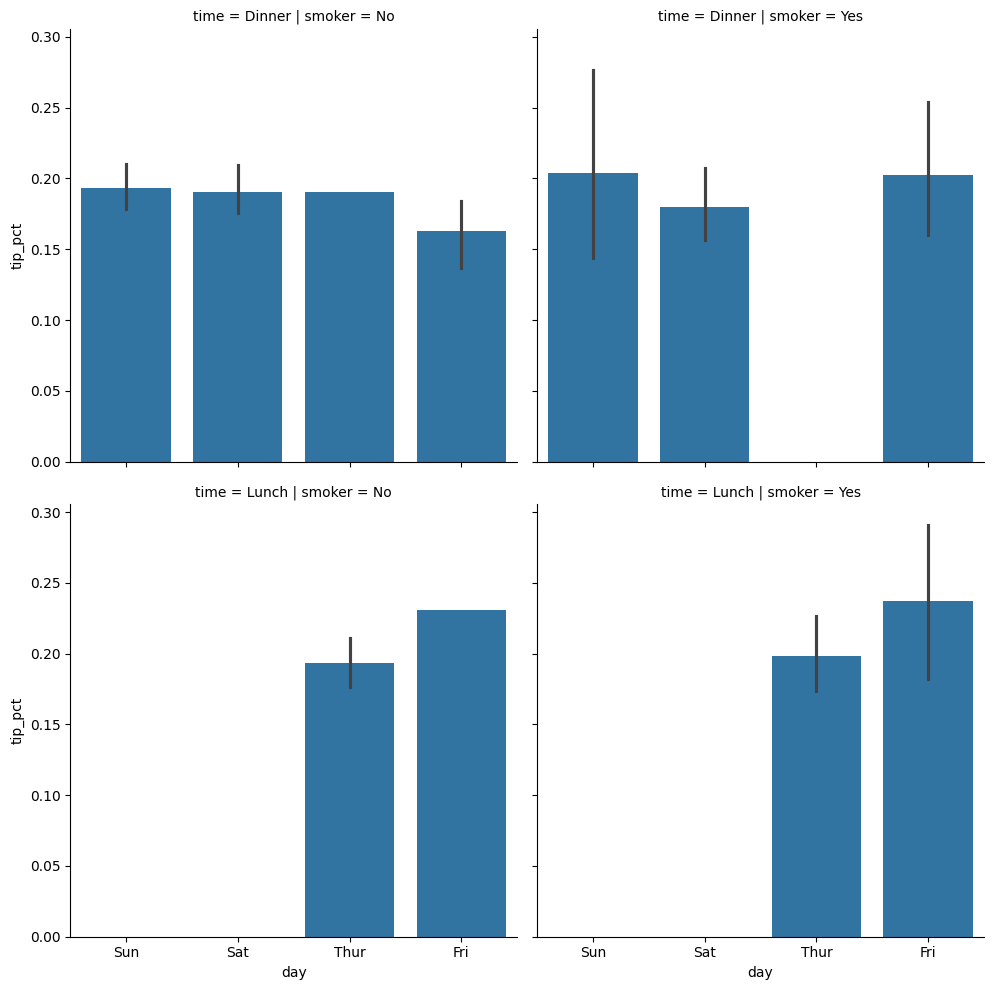

In [ ]:
# Instead of grouping by "time" by different bar colors within a facet, we can also
# expand the facet grid by adding one row per time value:
sns.catplot(x="day", y="tip_pct", row="time",
            col="smoker",
            kind="bar",
            data=tips[tips.tip_pct<1])